In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#imports do código
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [3]:
cls = Sequential()

# Bloco 1
cls.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3), padding='same'))
cls.add(BatchNormalization())
cls.add(MaxPooling2D(pool_size=(2,2)))
cls.add(Dropout(0.15))  # ← REDUZIDO de 0.2

# Bloco 2
cls.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cls.add(BatchNormalization())
cls.add(MaxPooling2D(pool_size=(2,2)))
cls.add(Dropout(0.15))  # ← REDUZIDO de 0.2

# Bloco 3
cls.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cls.add(BatchNormalization())
cls.add(MaxPooling2D(pool_size=(2,2)))
cls.add(Dropout(0.2))   # ← REDUZIDO de 0.3

# Flatten
cls.add(Flatten())

# Densas com menos dropout
cls.add(Dense(128, activation='relu'))
cls.add(Dropout(0.3))   # ← REDUZIDO de 0.4
cls.add(Dense(64, activation='relu'))
cls.add(Dropout(0.2))   # ← REDUZIDO de 0.3

# Saída
cls.add(Dense(1, activation='sigmoid'))

# Compilar com Learning Rate MENOR
cls.compile(
    optimizer=Adam(learning_rate=0.0005),  # ← REDUZIDO de 0.001
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cls.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,151,169 (4.39 MB)

 Trainable params: 1,150,721 (4.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [4]:
gerador_treinamento = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,        # ← REDUZIDO de 15
    width_shift_range=0.1,    # ← REDUZIDO de 0.15
    height_shift_range=0.1,   # ← REDUZIDO de 0.15
    horizontal_flip=True,
    zoom_range=0.1,           # ← REDUZIDO de 0.15
    fill_mode='nearest'
)

gerador_teste = ImageDataGenerator(rescale=1./255)  # Teste SEM augmentation

In [5]:
#  CONTROLE AQUI: Quantas você QUER usar
num_train = 4000  # Usar apenas 2000 das 4000 disponíveis
num_test = 1000    # Usar apenas 500 das 1000 disponíveis

batch_size = 64   # Escolha um que divida bem

# ========================================
# CARREGAR OS DADOS
# ========================================
base_treinamento = gerador_treinamento.flow_from_directory(
    '/content/drive/MyDrive/faculdade/Curso IA - Infoeste 2025/dataset2k/training_set',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

base_teste = gerador_teste.flow_from_directory(
    '/content/drive/MyDrive/faculdade/Curso IA - Infoeste 2025/dataset2k/test_set',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ========================================
# AQUI VOCÊ LIMITA!
# ========================================
steps_per_epoch = (num_train + batch_size - 1) // batch_size  # = 63
validation_steps = (num_test + batch_size - 1) // batch_size  # = 16


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,  # ← AUMENTADO de 7
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,   # ← AUMENTADO de 4
        verbose=1,
        min_lr=1e-7
    )
]


history = cls.fit(
    base_treinamento,
    steps_per_epoch=steps_per_epoch,
    epochs=15,  # ← Mais epochs, mas early stopping vai parar antes
    validation_data=base_teste,
    validation_steps=validation_steps,
    callbacks=callbacks
)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 849ms/step - accuracy: 0.5572 - loss: 0.8723 - val_accuracy: 0.5000 - val_loss: 1.2116 - learning_rate: 5.0000e-04
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 856ms/step - accuracy: 0.5958 - loss: 0.6867 - val_accuracy: 0.5000 - val_loss: 0.9152 - learning_rate: 5.0000e-04
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 88s 949ms/step - accuracy: 0.6422 - loss: 0.6231 - val_accuracy: 0.5190 - val_loss: 0.8044 - learning_rate: 5.0000e-04
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 829ms/step - accuracy: 0.6678 - loss: 0.6036 - val_accuracy: 0.5020 - val_loss: 1.3257 - learning_rate: 5.0000e-04
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 946ms/step - accuracy: 0.6838 - loss: 0.5973 - val_accuracy: 0.5410 - val_loss: 0.8901 - learning_rate: 5.0000e-04
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 815ms/step - accuracy: 0.6664 - loss: 0.5893 - val_accuracy: 0.6380 - val_loss: 0.6782 - learning_rate: 5.0000e-04
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 839ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


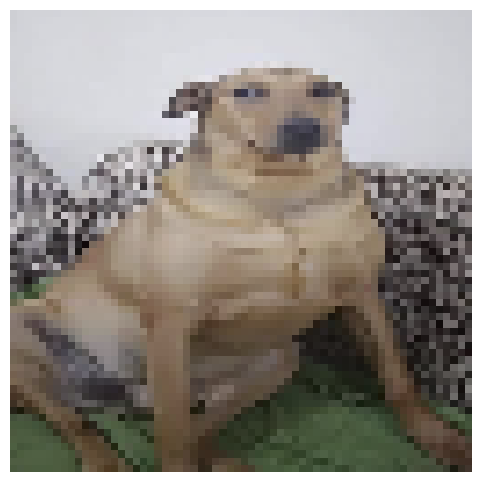

Valor bruto da rede: 0.4745
🐶 CACHORRO (52.5% confiante)


In [7]:
import matplotlib.pyplot as plt

imagem_teste = image.load_img(
    '/content/drive/MyDrive/faculdade/Curso IA - Infoeste 2025/sergio.png',
    target_size=(64, 64)
)
imagem_teste_array = image.img_to_array(imagem_teste) / 255.0
imagem_teste_array = np.expand_dims(imagem_teste_array, axis=0)

previsao = cls.predict(imagem_teste_array)
valor = float(previsao[0][0])

# NOVO: Cálculo de confiança
confianca = max(valor, 1-valor) * 100

plt.figure(figsize=(6, 6))
plt.imshow(imagem_teste)
plt.axis('off')
plt.show()

print(f"Valor bruto da rede: {valor:.4f}")

if valor > 0.5:
    print(f"🐱 GATO ({confianca:.1f}% confiante)")
else:
    print(f"🐶 CACHORRO ({confianca:.1f}% confiante)")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


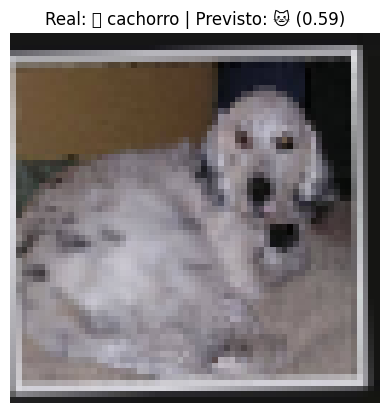

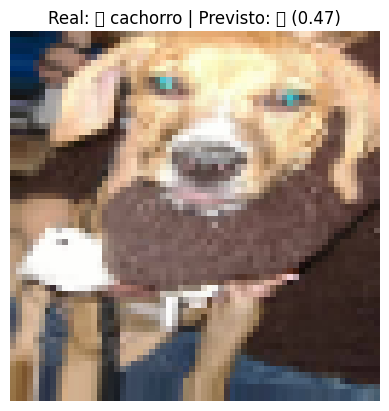

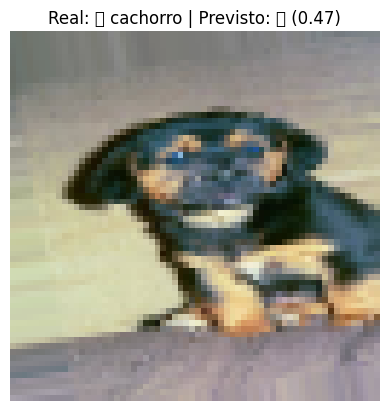

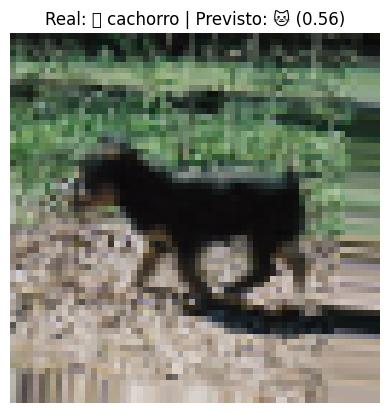

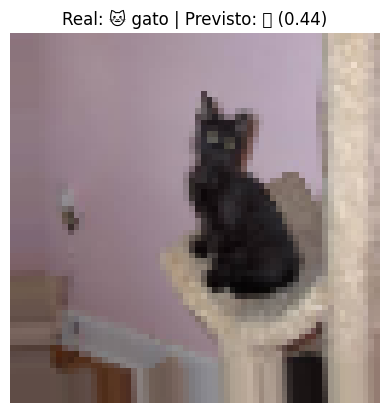

In [9]:
imgs, labels = next(base_treinamento)
preds = cls.predict(imgs)

for i in range(5):
    plt.imshow(imgs[i])
    real = "cachorro" if labels[i] == 0 else " gato"
    previsto = "cachorro" if preds[i][0] <= 0.5 else "gato"
    plt.title(f"Real: {real} | Previsto: {previsto} ({preds[i][0]:.2f})")
    plt.axis('off')
    plt.show()
